# **Trabalho 1 - Cálculo Numérico**

**Fazer comparações com os seguintes métodos:**

1.   Usando diretamente o comando "\\" (Matlab/Octave) ou "linalg.solve"(Python)
2.   Usando uma rotina de decomposição $LU$ + substituições progressiva e regressiva
3.   Usando o comando "chol"(Matlab/Octave) ou "linalg.cholesky"(Python) para decompor a matriz + substituições progressiva e regressiva
4.   Usando Eliminação de Gauss (sem pivoteamento)
5.   Usando Métodos iterativos de Gauss-Jacobi e Gauss-Seidel





# Parte 1: Matriz SPD Tridiagonal

Variáveis:

n = Ordem da matriz SPD

d = Elemento da diagonal principal

a = Elemento das outras duas diagonais

In [ ]:
import numpy as np
n = 5

d = 5
a = -2

e = np.ones(n)

A = np.diag(d*e) + np.diag(np.array(a*e[range(n-1)]),1) + np.diag(np.array(a*e[range(n-1)]),-1)

b = (d + (2*a))*e

print(A)
print("\n")
print(b)

print("\nSolução com linalg.solve\n")

S = np.linalg.solve(A,b)
print(S)

[[ 5. -2.  0.  0.  0.]
 [-2.  5. -2.  0.  0.]
 [ 0. -2.  5. -2.  0.]
 [ 0.  0. -2.  5. -2.]
 [ 0.  0.  0. -2.  5.]]


[1. 1. 1. 1. 1.]

Solução com linalg.solve

[0.47692308 0.69230769 0.75384615 0.69230769 0.47692308]


In [ ]:
#teste de tomada de tempo
import time

start = time.process_time()

print("Testando")
a = 2
b = 3
c = 5
print(a*b*c)
print((a**a)+(b**b)+(c**c))

end = time.process_time()

print("O tempo de processamento é:")
print(end - start)

Testando
30
3156
O tempo de processamento é:
0.0008980129999995867


In [ ]:
#teste 2
import time 
import numpy as np

start = time.process_time()
n = 8112
d = 5
a = -2

e = np.ones(n)

A = np.diag(d*e) + np.diag(np.array(a*e[range(n-1)]),1) + np.diag(np.array(a*e[range(n-1)]),-1)

b = (d + (2*a))*e

S = np.linalg.solve(A,b)
end = time.process_time()

print(end-start)

24.592168805000004


# Parte 2: Cálculo da Ordem de Custo

Para obter a ordem de custo computacional de algum método, precisa-se obter uma relação entre um
vetor T (com valores do tempo de processamento) e um vetor N (com valores das ordens das matrizes).
Esses dois vetores, devem se ajustar a uma expressão como a que segue:

$$T(N) = CN^p$$

onde C é uma constante real e $p$ é o valor da ordem de custo.

No espaço log-log:

$$T(N) = CN^p  \Rightarrow log(T) = log(C) + p *log(N)$$

Text(0, 0.5, 'T (log scale)')

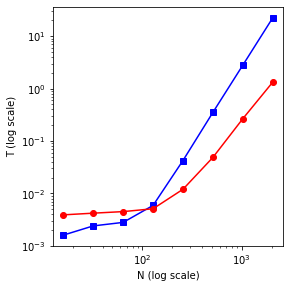

In [ ]:
import matplotlib.pyplot as plt

N = [16,32,64,128,256,512,1024,2048]
T1 = [0.0016,0.0024,0.0028,0.0059,0.0425,0.3521,2.8062,22.4496]
T2 = [0.0039,0.0042,0.0045,0.0051,0.0120,0.0487,0.2667,1.3300]

plt.figure(0,figsize =(4,4))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.loglog(N, T1, "b-s", N, T2, "r-o")
plt.xlabel("N (log scale)")
plt.ylabel("T (log scale)")

Text(0, 0.5, 'T (log scale)')

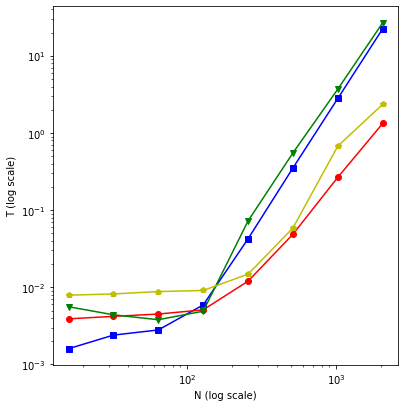

In [ ]:
# teste do gráfico para 4 comparações
import matplotlib.pyplot as plt

N = [16,32,64,128,256,512,1024,2048]
T1 = [0.0016,0.0024,0.0028,0.0059,0.0425,0.3521,2.8062,22.4496]
T2 = [0.0039,0.0042,0.0045,0.0051,0.0120,0.0487,0.2667,1.3300]
T3 = [0.0056,0.0044,0.0038,0.0049,0.0725,0.5521,3.7062,26.8496]
T4 = [0.0079,0.0082,0.0088,0.0091,0.0148,0.0587,0.6767,2.3560]

plt.figure(0,figsize =(6,6))
plt.subplots_adjust(right = 0.97, top = 0.98, left = 0.17, bottom = 0.15)
plt.loglog(N, T1, "b-s", N, T2, "r-o", N, T3, "g-v", N, T4, "y-p")
plt.xlabel("N (log scale)")
plt.ylabel("T (log scale)")

A ordem de custo pode ser calculada com o uso da função $polyfit$. Cada aplicação da função retorna
dois valores. O primeiro deles é a estimativa da ordem de convergência.


Observe, no entanto, que diferentes formas de calcular geram resultados bem distintos. Dentre os
resultados destes testes, o único apropriado seria o Plano 4, porque é o único que analisa o comportamento
linear da curva no qual ela aparentemente se estabiliza.

In [ ]:
#Plano 4: Cálculo baseado nos quatro últimos pares ordenados

m = len(N)
p1 = np.polyfit(np.log(np.array(N[m-4:m])), np.log(np.array(T1[m-4:m])),1)
p2 = np.polyfit(np.log(np.array(N[m-4:m])), np.log(np.array(T2[m-4:m])),1)

print(p1)
print(p2)

[  3.01295943 -19.85477794]
[  2.28299682 -17.15364591]


## Substituições progressiva e regressiva

Substituições diretas para resolução de sistemas triangulares inferiores e superiores, respectivamente.

In [ ]:
# Substituição Progressiva
# L: Matriz triangular inferior
# b: Termo independente
# x: Vetor solução

import numpy as np

def sub_progressiva(L,b):
  n = len(b)
  x = np.zeros((n,1))
  for i in range(n):
    x[i] = (b[i] - L[i, 0:i+1] @ x[0:i+1])/ L[i,i]
  return(x)

In [ ]:
#teste do algoritmo

L = np.array([[1,0,0],[2,3,0],[3,4,5]])
b = np.array([1,5,12])

t = sub_progressiva(L,b)
print(t)

[[1.]
 [1.]
 [1.]]


In [ ]:
#teste do algoritmo

L = np.array([[1,0,0],[1,1,0],[-2,4,1]])
b = np.array([3,5,-1])

t = sub_progressiva(L,b)
print(t)

[[ 3.]
 [ 2.]
 [-3.]]


In [ ]:
#teste do algoritmo

L = np.array([[1,0,0],[2,3,0],[3,4,5]])
b = np.array([1,5,12])

#t = sub_progressiva(L,b)
#print(t)
n = 3
for i in range(n):
    #x[i] = (b[i] - L[i, 0:i-1] * x[0:i-1])/ L[i,i]
    print(L[i, 0:i+1])

[1]
[2 3]
[3 4 5]


In [ ]:
n = 3
b = np.array([1,5,12])

for i in range(n):
  print(b[0:i+1])

[1]
[1 5]
[ 1  5 12]


In [ ]:
# Substituição Progressiva
# U: Matriz triangular superior
# b: Termo independente
# x: Vetor solução

import numpy as np

def sub_regressiva(U,b):
  n = len(b)
  x = np.zeros((n,1))
  for i in range(n-1,-1,-1):
    x[i] = (b[i] - U[i, i:n] @ x[i:n])/ U[i,i]
  return(x)

In [ ]:
# Teste do algoritmo
U = np.array([[1,2,0],[0,1,1],[0,0,-3]])
b = np.array([3,2,-3])

t = sub_regressiva(U,b)
print(t)

[[1.]
 [1.]
 [1.]]


In [ ]:
n = 3
for i in range(n-1,-1,-1):
  print(i)

2
1
0


In [ ]:
U = np.array([[1,1,1],[0,3,2],[0,0,5]])
b = np.array([1,5,12])

n = 3
for i in range(n-1,-1,-1):
    #x[i] = (b[i] - U[i, i:n] @ x[i+1:n])/ U[i,i]
    print(U[i,i:n])

[5]
[3 2]
[1 1 1]


In [ ]:
b = np.array([1,5,12])
n = 3

for i in range(n-1,-1,-1):
    #x[i] = (b[i] - U[i, i:n] @ x[i+1:n])/ U[i,i]
    print(b[i:n])

[12]
[ 5 12]
[ 1  5 12]


## Decomposição LU

Fatorar a matriz A em $A = LU$

In [ ]:
# Decomposição LU
import numpy as np

#A: matriz quadrada
#L,U: matrizes triangulares inferior e superior, respectivamente

def lu_decomp(A):
  n = A.shape[0]
  L = np.eye(n)
  U = np.zeros((n,n))
  for k in range(0,n):
    for j in range(k,n):
      U[k,j] = A[k,j]
      for s in range(0,k):
        U[k,j] = U[k,j] - L[k,s] * U[s,j]
    for i in range(k+1,n):
      L[i,k] = A[i,k]
      for s in range(0,k):
        L[i,k] = L[i,k] - L[i,s] * U[s,k]
      L[i,k] = L[i,k]/U[k,k]
  return(L,U)

In [ ]:
#teste do algoritmo
#A = np.array([[1,2,0],[1,3,1],[-2,0,1]])
A = np.array([[2,0,1],[4,3,7],[6,6,16]])

l,u = lu_decomp(A)
print(l)
print(u)

[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]
[[2. 0. 1.]
 [0. 3. 5.]
 [0. 0. 3.]]


In [ ]:
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

n = A.shape[0]
L = np.eye(n)
U = np.zeros((n,n))

print(A)
print(n)
print(L)
print(U)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
3
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
t = np.arange(1,11)
print(t)

[ 1  2  3  4  5  6  7  8  9 10]


## Decomposição de Cholesky

Fatorar a matriz A em: $A = HH^t$

In [ ]:
# teste do comando linalg.cholesky
import numpy as np

A = np.array([[4,2,-4],[2,10,4],[-4,4,9]])
# A = H@H^t
H = np.linalg.cholesky(A)
H_T = np.transpose(H)

print(H)
print(H_T)

[[ 2.  0.  0.]
 [ 1.  3.  0.]
 [-2.  2.  1.]]
[[ 2.  1. -2.]
 [ 0.  3.  2.]
 [ 0.  0.  1.]]


## Eliminação de Gauss (sem pivoteamento)

A partir de uma matriz $A$, obter uma matriz triangular superior e resolver o sistema com substituição regressiva.

In [ ]:
# Eliminação de Gauss
import numpy as np
# A = Matriz tridiagonal de ordem n
# b = Vetor independente

def sub_regressiva(U,b):
  n = len(b)
  x = np.zeros((n,1))
  for i in range(n-1,-1,-1):
    x[i] = (b[i] - U[i, i:n] @ x[i:n])/ U[i,i]
  return(x)

def eliminacao_gauss(A,b):
  n = A.shape[0]
  for k in range(n-1):
    m = -A[k+1][k]/A[k][k]
    A[k+1][k] = A[k+1][k] + m*A[k][k]
    A[k+1][k+1] = A[k+1][k+1] + m*A[k][k+1]
    b[k+1] = b[k+1] + m*b[k]
  #x = sub_regressiva(A,b)
  #return(x)
  return(A,b)

In [ ]:
#teste do algoritmo
A = np.array([[5,-2,0,0,0],[-2,5,-2,0,0],[0,-2,5,-2,0],[0,0,-2,5,-2],[0,0,0,-2,5]], dtype=np.float64)
b = np.array([1,1,1,1,1], dtype=np.float64)

M,v = eliminacao_gauss(A,b)
print(M)
print(v)

[[ 5.         -2.          0.          0.          0.        ]
 [ 0.          4.2        -2.          0.          0.        ]
 [ 0.          0.          4.04761905 -2.          0.        ]
 [ 0.          0.          0.          4.01176471 -2.        ]
 [ 0.          0.          0.          0.          4.00293255]]
[1.         1.4        1.66666667 1.82352941 1.90909091]


In [ ]:
# TESTE
A = np.array([[5,-2,0,0,0],[-2,5,-2,0,0],[0,-2,5,-2,0],[0,0,-2,5,-2],[0,0,0,-2,5]])
b = np.array([1,1,1,1,1])
A = A.astype(float)
b = b.astype(float)
print(A)
print(b)
print("Eliminação de Gauss:")
M,v = eliminacao_gauss(A,b)
print(M)
print(v)

[[ 5. -2.  0.  0.  0.]
 [-2.  5. -2.  0.  0.]
 [ 0. -2.  5. -2.  0.]
 [ 0.  0. -2.  5. -2.]
 [ 0.  0.  0. -2.  5.]]
[1. 1. 1. 1. 1.]
Eliminação de Gauss:
[[ 5.         -2.          0.          0.          0.        ]
 [ 0.          4.2        -2.          0.          0.        ]
 [ 0.          0.          4.04761905 -2.          0.        ]
 [ 0.          0.          0.          4.01176471 -2.        ]
 [ 0.          0.          0.          0.          4.00293255]]
[1.         1.4        1.66666667 1.82352941 1.90909091]


In [ ]:
#testes
n = 3
for i in range(n-1):
  print(i)

0
1


In [ ]:
import numpy as np

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)
print(A[0])
print(A[0][0])
print(A[1][1])
print(A[2][2])
print(A[2][2]/A[0][2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]
1
5
9
3.0


In [ ]:
b = np.array([1,1,1,1,1])
b[1] = b[1]+ 2*3
print(b)

[1 7 1 1 1]


In [ ]:
A = np.array([[5,-2,0,0,0],[-2,5,-2,0,0],[0,-2,5,-2,0],[0,0,-2,5,-2],[0,0,0,-2,5]],dtype=np.float64)
b = np.array([1,1,1,1,1], dtype = np.float64)
k = 0

print(A[k+1][k])
print(A[k+1][k+1])

m = -A[k+1][k]/A[k][k]
A[k+1][k] = A[k+1][k] + m*A[k][k]
A[k+1][k+1] = A[k+1][k+1] + m*A[k][k+1]
b[k+1] = b[k+1] + m*b[k]

print(A)
print(b)
print(m)
print(A[k+1][k], m*A[k][k], A[k][k])
print(A[k+1][k+1], m*A[k][k+1], A[k][k+1])
print(b[k+1], m*b[k])

-2.0
5.0
[[ 5.  -2.   0.   0.   0. ]
 [ 0.   4.2 -2.   0.   0. ]
 [ 0.  -2.   5.  -2.   0. ]
 [ 0.   0.  -2.   5.  -2. ]
 [ 0.   0.   0.  -2.   5. ]]
[1.  1.4 1.  1.  1. ]
0.4
0.0 2.0 5.0
4.2 -0.8 -2.0
1.4 0.4


In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)

A = A.astype(float)
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


## Métodos Iterativos: Gauss-Jacobi

In [ ]:
# Algoritmo Gauss-Jacobi para Matriz Tridiagonal
import numpy as np

# x: vetor solução
# x0: chute inicial
# b: termo independente

def erro_relativo(x,x0,n):
  e1 = 0
  e2 = 0
  for i in range(n):
    e1 += (x[i] - x0[i])**2
    e2 += (x[i])**2
  erro_rel = (e1**(1/2))/(e2**(1/2))
  return(erro_rel)

def Gauss_Jacobi(d,a,n,x0,b):
  x = np.zeros((n,1))
  tol = 10**(-8)
  erro = 1
  while(erro > tol):
    for i in range(0,n):
      if i == 0:
        x[i] = (b[i] - a*x0[i+1])/d
      elif(1 <= i <= (n-2)):
        x[i] = (b[i] - a*(x0[i-1] + x0[i+1]))/d
      else:
        x[i] = (b[i] - a*x0[i-1])/d
    erro = erro_relativo(x,x0,n)
    x0 = x
    x = np.zeros((n,1))
  return(x0)


In [ ]:
# Teste do algoritmo
# chute inicial
x0 = np.array([1,1,1,1,1])
n = 5
d = 5
a = -2
e = np.ones(n)
b = (d + (2*a))*e

s = Gauss_Jacobi(d,a,n,x0,b)
print(s)

[[0.47692308]
 [0.6923077 ]
 [0.75384617]
 [0.6923077 ]
 [0.47692308]]
48


In [ ]:
n = 5
for i in range(0,n):
  if(i == 0):
    #print("x %d" %i)
    print("x[%d] = (b[%d] - a*x0[%d])/d" %(i+1,i+1,i+2))
    print("start")
  elif(1 <= i <= (n-2)):
    #print("x %d" %i)
    print("x[%d] = (b[%d] - a*(x[%d] + x0[%d]))/d" %(i+1,i+1,i,i+2))
  else:
    print("end")
    #print("x %d" %i)
    print("x[%d] = (b[%d] - a*x[%d])/d" %(i+1,i+1,i))

x[1] = (b[1] - a*x0[2])/d
start
x[2] = (b[2] - a*(x[1] + x0[3]))/d
x[3] = (b[3] - a*(x[2] + x0[4]))/d
x[4] = (b[4] - a*(x[3] + x0[5]))/d
end
x[5] = (b[5] - a*x[4])/d


In [ ]:
import numpy as np

x = np.array([1.22,-1.86,0.94])
x0 = np.array([0.7,-1.6,0.6])

def erro_relativo(x,x0,n):
  e1 = 0
  e2 = 0
  for i in range(n):
    e1 += (x[i] - x0[i])**2
    e2 += (x[i])**2
  erro_rel = (e1**(1/2))/(e2**(1/2))
  return(erro_rel)

E = erro_relativo(x,x0,3)
print(E)

0.27889624001829794


In [ ]:
n = 5
erro = 1
tol = 0.3

while(erro > tol):
  n = n/2
  print(n)
  erro = n 


2.5
1.25
0.625
0.3125
0.15625


In [ ]:
import numpy as np

x = np.array([1.22,-1.86,0.94])
x0 = np.array([0.7,-1.6,0.6])

x = x0
print(x)

[ 0.7 -1.6  0.6]


## Métodos Iterativos: Gauss-Seidel

In [ ]:
# Algoritmo Gauss-Seidel para Matriz Tridiagonal
import numpy as np

# x: vetor solução
# x0: chute inicial
# b: termo independente

def erro_relativo(x,x0,n):
  e1 = 0
  e2 = 0
  for i in range(n):
    e1 += (x[i] - x0[i])**2
    e2 += (x[i])**2
  erro_rel = (e1**(1/2))/(e2**(1/2))
  return(erro_rel)

def Gauss_Seidel(d,a,n,x0,b):
  x = np.zeros((n,1))
  tol = 10**(-8)
  erro = 1
  while(erro > tol):
    for i in range(0,n):
      if i == 0:
        x[i] = (b[i] - a*x0[i+1])/d
      elif(1 <= i <= (n-2)):
        x[i] = (b[i] - a*(x[i-1] + x0[i+1]))/d
      else:
        x[i] = (b[i] - a*x[i-1])/d
    erro = erro_relativo(x,x0,n)
    x0 = x
    x = np.zeros((n,1))
  return(x0)

In [ ]:
# Teste do algoritmo
x0 = np.array([1,1,1,1,1])
n = 5
d = 5
a = -2
e = np.ones(n)
b = (d + (2*a))*e

s = Gauss_Seidel(d,a,n,x0,b)
print(s)

[[0.47692308]
 [0.6923077 ]
 [0.75384616]
 [0.69230769]
 [0.47692308]]
26


In [ ]:
L1 = [0.0002822599999490194, 0.00014602999999624444, 0.00013413999977274216, 
      0.0001341600000159815, 0.00013391999982559355]

print(L1)

[0.0002822599999490194, 0.00014602999999624444, 0.00013413999977274216, 0.0001341600000159815, 0.00013391999982559355]


In [1]:
#exemplos
import numpy as np
import timeit

def linalg_solve(n):
    d = 5
    a = -2

    e = np.ones(n)

    A = np.diag(d*e) + np.diag(np.array(a*e[range(n-1)]),1) + np.diag(np.array(a*e[range(n-1)]),-1)

    b = (d + (2*a))*e

    S = np.linalg.solve(A,b)
    return(S)

In [2]:
# Algoritmo de decomposição LU + substituições progressiva e regressiva

# Substituição Progressiva
# L: Matriz triangular inferior
# b: Termo independente
# x: Vetor solução

import numpy as np
import timeit

def sub_progressiva(L,b):
  n = len(b)
  x = np.zeros((n,1))
  for i in range(n):
    x[i] = (b[i] - L[i, 0:i+1] @ x[0:i+1])/ L[i,i]
  return(x)

# Substituição regressiva
# U: Matriz triangular superior
# b: Termo independente
# x: Vetor solução

def sub_regressiva(U,b):
  n = len(b)
  x = np.zeros((n,1))
  for i in range(n-1,-1,-1):
    x[i] = (b[i] - U[i, i:n] @ x[i:n])/ U[i,i]
  return(x)

# Decomposição LU
#A: matriz quadrada
#L,U: matrizes triangulares inferior e superior, respectivamente

def lu_decomp(A):
  n = A.shape[0]
  L = np.eye(n)
  U = np.zeros((n,n))
  for k in range(0,n):
    for j in range(k,n):
      U[k,j] = A[k,j]
      for s in range(0,k):
        U[k,j] = U[k,j] - L[k,s] * U[s,j]
    for i in range(k+1,n):
      L[i,k] = A[i,k]
      for s in range(0,k):
        L[i,k] = L[i,k] - L[i,s] * U[s,k]
      L[i,k] = L[i,k]/U[k,k]
  return(L,U)

def sol_dec_LU(n):
  d = 5
  a = -2
  e = np.ones(n)
  A = np.diag(d*e) + np.diag(np.array(a*e[range(n-1)]),1) + np.diag(np.array(a*e[range(n-1)]),-1)
  b = (d + (2*a))*e

  L,U = lu_decomp(A)
  y = sub_progressiva(L,b)
  x = sub_regressiva(U,y)
  return(x)

In [3]:
# Algoritmo da Decomposição de Cholesky + substituições progressiva e regressiva

# Substituição Progressiva
# L: Matriz triangular inferior
# b: Termo independente
# x: Vetor solução

import numpy as np
import timeit

def sub_progressiva(L,b):
  n = len(b)
  x = np.zeros((n,1))
  for i in range(n):
    x[i] = (b[i] - L[i, 0:i+1] @ x[0:i+1])/ L[i,i]
  return(x)

# Substituição regressiva
# U: Matriz triangular superior
# b: Termo independente
# x: Vetor solução

def sub_regressiva(U,b):
  n = len(b)
  x = np.zeros((n,1))
  for i in range(n-1,-1,-1):
    x[i] = (b[i] - U[i, i:n] @ x[i:n])/ U[i,i]
  return(x)

def sol_cholesky(n):
  d = 5
  a = -2
  e = np.ones(n)
  A = np.diag(d*e) + np.diag(np.array(a*e[range(n-1)]),1) + np.diag(np.array(a*e[range(n-1)]),-1)
  b = (d + (2*a))*e
  # A = H@H^t
  H = np.linalg.cholesky(A)
  H_T = np.transpose(H)
  y = sub_progressiva(H,b)
  x = sub_regressiva(H_T,y)
  return(x)

In [4]:
# Algoritmo Eliminação de Gauss +  substituição regressiva
# Eliminação de Gauss
import numpy as np
import timeit
# A = Matriz tridiagonal de ordem n
# b = Vetor independente

def sub_regressiva(U,b):
  n = len(b)
  x = np.zeros((n,1))
  for i in range(n-1,-1,-1):
    x[i] = (b[i] - U[i, i:n] @ x[i:n])/ U[i,i]
  return(x)

def eliminacao_gauss(A,b):
  n = A.shape[0]
  for k in range(n-1):
    m = -A[k+1][k]/A[k][k]
    A[k+1][k] = A[k+1][k] + m*A[k][k]
    A[k+1][k+1] = A[k+1][k+1] + m*A[k][k+1]
    b[k+1] = b[k+1] + m*b[k]
  #x = sub_regressiva(A,b)
  #return(x)
  return(A,b)

def sol_EG(n):
  d = 5
  a = -2
  e = np.ones(n)
  A = np.diag(d*e) + np.diag(np.array(a*e[range(n-1)]),1) + np.diag(np.array(a*e[range(n-1)]),-1)
  b = (d + (2*a))*e
  U,y = eliminacao_gauss(A,b)
  x = sub_regressiva(U,y)
  return(x)

In [5]:
# Algoritmo Gauss-Jacobi para Matriz Tridiagonal
import numpy as np
import timeit

# x: vetor solução
# x0: chute inicial
# b: termo independente

def erro_relativo(x,x0,n):
  e1 = 0
  e2 = 0
  for i in range(n):
    e1 += (x[i] - x0[i])**2
    e2 += (x[i])**2
  erro_rel = (e1**(1/2))/(e2**(1/2))
  return(erro_rel)

def Gauss_Jacobi(d,a,n,x0,b):
  x = np.zeros((n,1))
  tol = 10**(-8)
  kmax = 1000
  erro = 1
  k = 0
  while((erro > tol) or (k == kmax)):
    for i in range(0,n):
      if i == 0:
        x[i] = (b[i] - a*x0[i+1])/d
      elif(1 <= i <= (n-2)):
        x[i] = (b[i] - a*(x0[i-1] + x0[i+1]))/d
      else:
        x[i] = (b[i] - a*x0[i-1])/d
    erro = erro_relativo(x,x0,n)
    x0 = x
    x = np.zeros((n,1))
    k += 1
  return(x0,k)

def sol_GJ(n):
  d = 5
  a = -2
  e = np.ones(n)
  b = (d + (2*a))*e
  #chute inicial: x0 = [1,...,1]
  x0 = np.ones(n)
  s,k = Gauss_Jacobi(d,a,n,x0,b)
  return(s,k)

In [6]:
# Algoritmo Gauss-Seidel para Matriz Tridiagonal
import numpy as np

# x: vetor solução
# x0: chute inicial
# b: termo independente

def erro_relativo(x,x0,n):
  e1 = 0
  e2 = 0
  for i in range(n):
    e1 += (x[i] - x0[i])**2
    e2 += (x[i])**2
  erro_rel = (e1**(1/2))/(e2**(1/2))
  return(erro_rel)

def Gauss_Seidel(d,a,n,x0,b):
  x = np.zeros((n,1))
  tol = 10**(-8)
  kmax = 1000
  k = 0
  erro = 1
  while((erro > tol) or (k == kmax)):
    for i in range(0,n):
      if i == 0:
        x[i] = (b[i] - a*x0[i+1])/d
      elif(1 <= i <= (n-2)):
        x[i] = (b[i] - a*(x[i-1] + x0[i+1]))/d
      else:
        x[i] = (b[i] - a*x[i-1])/d
    erro = erro_relativo(x,x0,n)
    x0 = x
    x = np.zeros((n,1))
    k += 1
  return(x0,k)

def sol_GS(n):
  d = 5
  a = -2
  e = np.ones(n)
  b = (d + (2*a))*e
  #chute inicial: x0 = [1,...,1]
  x0 = np.ones(n)
  s,k = Gauss_Seidel(d,a,n,x0,b)
  return(s,k)

In [8]:
# Resoloção do sistema Ax = b de ordem n = 5
a = linalg_solve(5)
print(a)

[0.47692308 0.69230769 0.75384615 0.69230769 0.47692308]


In [9]:
b = sol_dec_LU(5)
print(b)

[[0.47692308]
 [0.69230769]
 [0.75384615]
 [0.69230769]
 [0.47692308]]


In [10]:
c = sol_cholesky(5)
print(c)

[[0.47692308]
 [0.69230769]
 [0.75384615]
 [0.69230769]
 [0.47692308]]


In [11]:
d = sol_EG(5)
print(d)

[[0.47692308]
 [0.69230769]
 [0.75384615]
 [0.69230769]
 [0.47692308]]


In [14]:
# chute inicial x0 = [1,1,1,1,1]
e,k = sol_GJ(5)
f,l = sol_GS(5)

print(e,"Número de iterações: ", k)
print(f,"Número de iterações: ", l)

[[0.47692308]
 [0.6923077 ]
 [0.75384617]
 [0.6923077 ]
 [0.47692308]] Número de iterações:  48
[[0.47692308]
 [0.6923077 ]
 [0.75384616]
 [0.69230769]
 [0.47692308]] Número de iterações:  26
